In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os.path
import numpy as np
import datetime
import os
import geopy
import folium
from scipy import stats

In [9]:
gdf = gpd.read_file("gdf_all_data.geojson") 

df = pd.read_csv("all_data.csv")

In [12]:
gdf_user1 = gdf[gdf['User'] == 'User1']
gdf_user2 = gdf[gdf['User'] == 'User2']
#gdf.tripNr.unique()
gdf_user1

,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,mode,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry
0,2017-06-22T08:46:43.389999,1.498121e+12,0.550023,0.449164,-0.564783,-0.420408,-0.595957,-1.372849,0.173059,1005.107631,...,unlabelled,220617.020,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84699 -0.13341)
1,2017-06-22T08:46:46.619999,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,unlabelled,220617.020,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339)
2,2017-06-22T08:46:52.430000,1.498121e+12,0.704656,0.686372,-0.113010,0.139928,-0.948191,-4.295378,-0.132671,1005.145165,...,Walking,220617.000,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84689 -0.13337)
3,2017-06-22T08:46:53.430000,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,Walking,220617.000,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338)
4,2017-06-22T08:46:57.439999,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,Walking,220617.000,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,2017-06-27T18:25:29.770000,1.498588e+12,0.098604,-0.362917,-0.696355,-0.611275,-0.018200,-0.009921,0.019379,995.976847,...,unlabelled,270617.019,User1,270617,8.270347,12.029999,2.474917,0.290482,2.474917,POINT (50.84626 -0.13430)
8379,2017-06-27T18:25:31.770000,1.498588e+12,0.098598,-0.362778,-0.696167,-0.611573,0.003987,0.032127,-0.038913,995.992018,...,unlabelled,270617.019,User1,270617,3.316344,2.000000,5.969419,-2.315494,5.969419,POINT (50.84628 -0.13431)
8380,2017-06-27T18:27:41.070000,1.498588e+12,0.096907,-0.362329,-0.696789,-0.611401,-0.009542,-0.001200,0.008652,995.968729,...,unlabelled,270617.019,User1,270617,48.071939,129.300000,1.338430,-0.005233,1.338430,POINT (50.84666 -0.13398)
8381,2017-06-27T18:27:44.080002,1.498588e+12,0.096913,-0.362298,-0.696746,-0.611466,0.011296,-0.011515,0.010872,995.973422,...,unlabelled,270617.019,User1,270617,0.553362,3.009999,0.661828,-0.219877,0.661828,POINT (50.84667 -0.13398)


# data processing

Text(0, 0.5, 'Latitude')

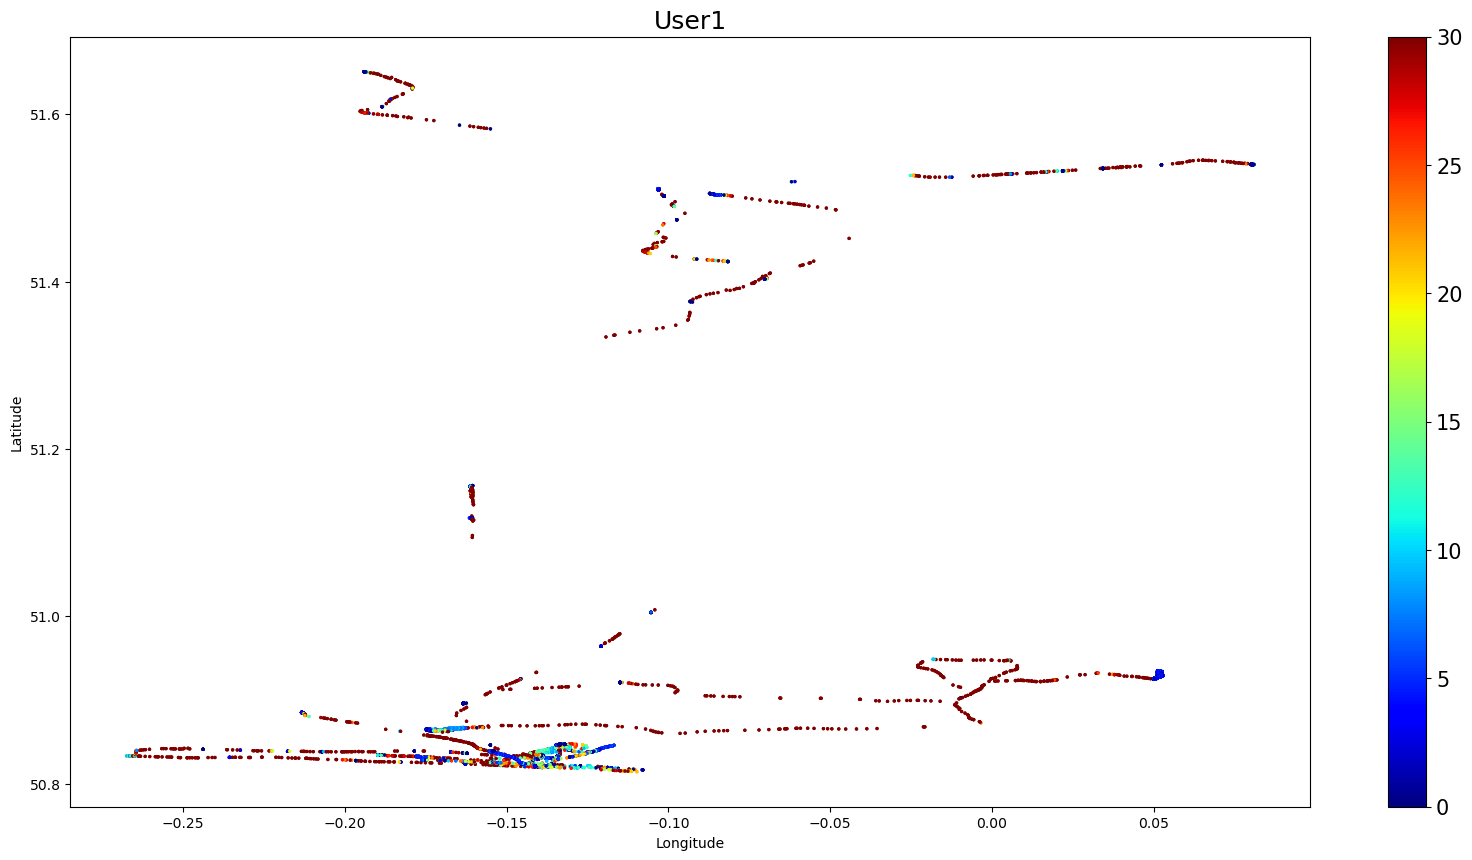

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
plt.rcParams.update({'font.size': 15})

sc1 = ax.scatter(gdf_user1.geometry.y.values,gdf_user1.geometry.x.values,c=gdf_user1.vel,cmap = plt.cm.jet,vmin=0, vmax=30 ,s=2)
ax.scatter(gdf_user1.geometry.y.values,
              gdf_user1.geometry.x.values,
              c=gdf_user1.vel.values,
              cmap = plt.cm.jet,
               vmin=0, vmax=30,
              s=2)
ax.set_title('User1')
fig.colorbar(sc1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')